In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.metrics import (confusion_matrix, recall_score, precision_score, roc_auc_score,
                                accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix,
                                roc_curve, auc)

import ipyvolume as ipv
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from ipywidgets import ColorPicker, VBox, \
    interact, interactive, fixed
import struct
#from chart_studio.plotly import plot, iplot
#from plotly.offline import iplot

In [4]:
from package import (data_balancer, MultiLayerPerceptron, softmax, sigmoid, Loss_Perceptron,Weight_Initialization,
                        KNeighbors, forest, svm, perceptron)
from sklearn.metrics import (confusion_matrix, recall_score, precision_score, roc_auc_score,
                                accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix,
                                roc_curve, auc)
from sklearn.model_selection import (cross_val_score, cross_validate, train_test_split)

ImportError: cannot import name 'perceptron' from 'package' (/Users/furkanoruc/Desktop/MSc./OZ-SPRING2021/Research - AIS/Code Work/package.py)

In [ ]:
from sklearn.cluster import DBSCAN
import time

In [2]:
dataset = pd.read_csv('merged_seasons_AIS',sep=',')

In [1]:
dataset.head(5)

NameError: name 'dataset' is not defined

In [4]:
dataset.isnull().values.any()

True

In [5]:
dataset.rename(columns={"Ditance (m)": "Distance (m)"}, inplace=True)

In [6]:
dataset["Violation/Length (m)"] = (dataset["Violation Distance (m)"])/(dataset["Base Ship Length (m)"])

In [7]:
dataset.head(5)

,Base Ship Length (m),Base Ship Length Dimensionless,Compared Ship Speed (m/s),Compared Ship Speed Dimensionless,Distance (m),Distance Dimensionless,Ship Domain (m)(2*Base Ship Length),Ship Domain Dimensionless,Violation Distance (m),Violation Distance Dimensionless,Violation Check,area,season,Violation/Length (m)
0,22.0,0.062857,4.9858,0.623225,93.806611,0.093807,44.0,0.044,49.806611,0.062071,0,1,Spring,2.263937
1,185.0,0.528571,11.2052,1.400650,896.664504,0.896665,370.0,0.370,526.664504,0.656352,0,1,Spring,2.846835
2,22.0,0.062857,5.4998,0.687475,524.199655,0.524200,44.0,0.044,480.199655,0.598445,0,1,Spring,21.827257
3,190.0,0.542857,4.7802,0.597525,732.630581,0.732631,380.0,0.380,352.630581,0.439463,0,1,Spring,1.855950
4,83.0,0.237143,4.3690,0.546125,968.411765,0.968412,166.0,0.166,802.411765,1.000000,0,1,Spring,9.667612


In [8]:
dataset.rename(columns={'area': "Area"}, inplace=True)

In [9]:
dataset.rename(columns={'season': "Season"}, inplace=True)

In [10]:
dataset = dataset.dropna()

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73797 entries, 0 to 73797
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Base Ship Length (m)                 73797 non-null  float64
 1   Base Ship Length Dimensionless       73797 non-null  float64
 2   Compared Ship Speed (m/s)            73797 non-null  float64
 3   Compared Ship Speed Dimensionless    73797 non-null  float64
 4   Distance (m)                         73797 non-null  float64
 5   Distance Dimensionless               73797 non-null  float64
 6   Ship Domain (m)(2*Base Ship Length)  73797 non-null  float64
 7   Ship Domain Dimensionless            73797 non-null  float64
 8   Violation Distance (m)               73797 non-null  float64
 9   Violation Distance Dimensionless     73797 non-null  float64
 10  Violation Check                      73797 non-null  int64  
 11  Area                        

In [12]:
dataset = dataset.drop(dataset[dataset["Compared Ship Speed (m/s)"] > 22].index)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73743 entries, 0 to 73797
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Base Ship Length (m)                 73743 non-null  float64
 1   Base Ship Length Dimensionless       73743 non-null  float64
 2   Compared Ship Speed (m/s)            73743 non-null  float64
 3   Compared Ship Speed Dimensionless    73743 non-null  float64
 4   Distance (m)                         73743 non-null  float64
 5   Distance Dimensionless               73743 non-null  float64
 6   Ship Domain (m)(2*Base Ship Length)  73743 non-null  float64
 7   Ship Domain Dimensionless            73743 non-null  float64
 8   Violation Distance (m)               73743 non-null  float64
 9   Violation Distance Dimensionless     73743 non-null  float64
 10  Violation Check                      73743 non-null  int64  
 11  Area                        

In [14]:
cols = dataset.columns.tolist()

In [15]:
df = dataset[['Base Ship Length (m)',
 'Compared Ship Speed (m/s)',
 'Distance (m)',
 'Ship Domain (m)(2*Base Ship Length)',
 'Violation Distance (m)',
 'Violation Check',
 'Area',
 'Season',
 'Violation/Length (m)']]

In [16]:
df.head(5)

,Base Ship Length (m),Compared Ship Speed (m/s),Distance (m),Ship Domain (m)(2*Base Ship Length),Violation Distance (m),Violation Check,Area,Season,Violation/Length (m)
0,22.0,4.9858,93.806611,44.0,49.806611,0,1,Spring,2.263937
1,185.0,11.2052,896.664504,370.0,526.664504,0,1,Spring,2.846835
2,22.0,5.4998,524.199655,44.0,480.199655,0,1,Spring,21.827257
3,190.0,4.7802,732.630581,380.0,352.630581,0,1,Spring,1.855950
4,83.0,4.3690,968.411765,166.0,802.411765,0,1,Spring,9.667612


In [17]:
temp = df["Violation Distance (m)"]

In [18]:
temp

0         49.806611
1        526.664504
2        480.199655
3        352.630581
4        802.411765
            ...    
73793    114.226661
73794    224.017564
73795   -116.588655
73796     60.140328
73797    260.676097
Name: Violation Distance (m), Length: 73743, dtype: float64

In [19]:
temp_n = []
for i in temp:
    if i < 0:
        x = i
        temp_n.append(x)

In [20]:
temp_p = []
for i in temp:
    if i > 0:
        x = i
        temp_p.append(x)

In [21]:
max(temp_p)

949.9355257

In [22]:
min(temp_p)

0.0035301000000060897

In [23]:
max(temp_n)

-0.0007411999999931138

In [24]:
min(temp_n)

-510.7728714

In [25]:
df.describe()

,Base Ship Length (m),Compared Ship Speed (m/s),Distance (m),Ship Domain (m)(2*Base Ship Length),Violation Distance (m),Violation Check,Area,Violation/Length (m)
count,73743.000000,73743.000000,73743.000000,73743.000000,73743.000000,73743.000000,73743.000000,73743.000000
mean,135.537868,4.890946,515.049063,271.075736,243.973327,0.203613,6.962993,2.339603
std,49.833372,1.221114,250.184271,99.666744,269.356959,0.402687,3.541258,2.967952
min,17.000000,1.336400,1.644267,34.000000,-510.772871,0.000000,1.000000,-1.991391
25%,100.000000,4.009200,300.642506,200.000000,29.828458,0.000000,4.000000,0.224136
50%,120.000000,4.883000,469.375613,240.000000,206.783437,0.000000,7.000000,1.645993
75%,171.000000,5.756800,729.322454,342.000000,459.813335,0.000000,10.000000,3.820428
max,329.000000,14.443400,999.948540,658.000000,949.935526,1.000000,13.000000,45.865932


In [26]:
#Adding dimensionless Violation Distance, Seperately Scaled for negative and positive
df["VD_Dimensionless_2SD"] = df["Violation Distance (m)"].apply(lambda x: ((x-min(temp_p))/(max(temp_p)-min(temp_p))) if x>0 else ((x-max(temp_n))/(max(temp_n)-min(temp_n))))


/Users/furkanoruc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
#Firstly, investigate the max min scale of V/L

In [28]:
(df["Violation/Length (m)"] < 5).count()

73743

In [29]:
temp2 = df["Violation/Length (m)"]

In [30]:
temp_n_2 = []
for i in temp2:
    if i < 0:
        x = i
        temp_n_2.append(x)

In [31]:
temp_p_2 = []
for i in temp2:
    if i >= 0:
        x = i
        temp_p_2.append(x)

In [32]:
"""df_copy["SPEED"] = df_copy["Compared Ship Speed (m/s)"].apply(lambda x: ((x-df_copy["Compared Ship Speed (m/s)"].min())/(df_copy["Compared Ship Speed (m/s)"].max()-df_copy["Compared Ship Speed (m/s)"].min())))
df_copy["DIST"] = df_copy["Distance (m)"].apply(lambda x: ((x-df_copy["Distance (m)"].min())/(df_copy["Distance (m)"].max()-df_copy["Distance (m)"].min())))"""

'df_copy["SPEED"] = df_copy["Compared Ship Speed (m/s)"].apply(lambda x: ((x-df_copy["Compared Ship Speed (m/s)"].min())/(df_copy["Compared Ship Speed (m/s)"].max()-df_copy["Compared Ship Speed (m/s)"].min())))\ndf_copy["DIST"] = df_copy["Distance (m)"].apply(lambda x: ((x-df_copy["Distance (m)"].min())/(df_copy["Distance (m)"].max()-df_copy["Distance (m)"].min())))'

In [33]:
df["Speed_Dimensionless"] = df["Compared Ship Speed (m/s)"].apply(lambda x: ((x-df["Compared Ship Speed (m/s)"].min())/(df["Compared Ship Speed (m/s)"].max()-df["Compared Ship Speed (m/s)"].min())))
df["Distance_Dimensionless"] = df["Distance (m)"].apply(lambda x: ((x-df["Distance (m)"].min())/(df["Distance (m)"].max()-df["Distance (m)"].min())))

/Users/furkanoruc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/furkanoruc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
#Dimensionless application for length of base ship
df["Length_Dimensionless"] = df["Base Ship Length (m)"].apply(lambda x: ((x-df["Base Ship Length (m)"].min())/(df["Base Ship Length (m)"].max()-df["Base Ship Length (m)"].min())))

/Users/furkanoruc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


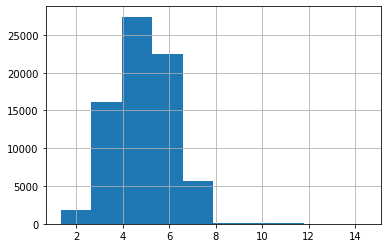

In [90]:
#To observe if there are any outliers
df["Compared Ship Speed (m/s)"].hist(bins = 10)

In [91]:
#Observation on distribution of violation/length
count = 0
for i in df["Compared Ship Speed (m/s)"]:
    if i > 8:
        count += 1
count

200

In [7]:
df = pd.read_csv('Preprocessed_Merged.csv')

In [8]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73543 entries, 0 to 73542
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           73543 non-null  int64  
 1   Base Ship Length (m)                 73543 non-null  float64
 2   Compared Ship Speed (m/s)            73543 non-null  float64
 3   Distance (m)                         73543 non-null  float64
 4   Ship Domain (m)(2*Base Ship Length)  73543 non-null  float64
 5   Violation Distance (m)               73543 non-null  float64
 6   Violation Check                      73543 non-null  int64  
 7   Area                                 73543 non-null  int64  
 8   Season                               73543 non-null  object 
 9   Violation/Length (m)                 73543 non-null  float64
 10  VD_Dimensionless_2SD                 73543 non-null  float64
 11  Speed_Dimensionless         

In [94]:
df.iloc[:,10].min()

-1.0

<Figure size 1152x576 with 0 Axes>

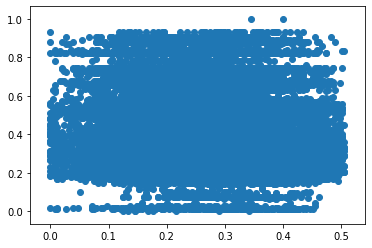

<Figure size 1152x576 with 0 Axes>

In [95]:
plt.scatter(df.loc[:,"Speed_Dimensionless"], df.loc[:,"Length_Dimensionless"])
plt.figure(figsize=(16,8))

In [103]:
df = df.drop(df[df["Compared Ship Speed (m/s)"] > 8].index)

<Figure size 1152x576 with 0 Axes>

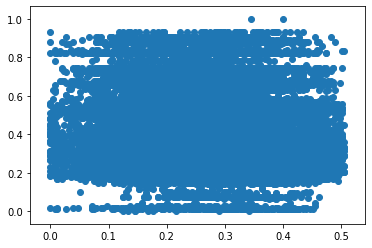

<Figure size 1152x576 with 0 Axes>

In [104]:
plt.scatter(df.loc[:,"Speed_Dimensionless"], df.loc[:,"Length_Dimensionless"])
plt.figure(figsize=(16,8))

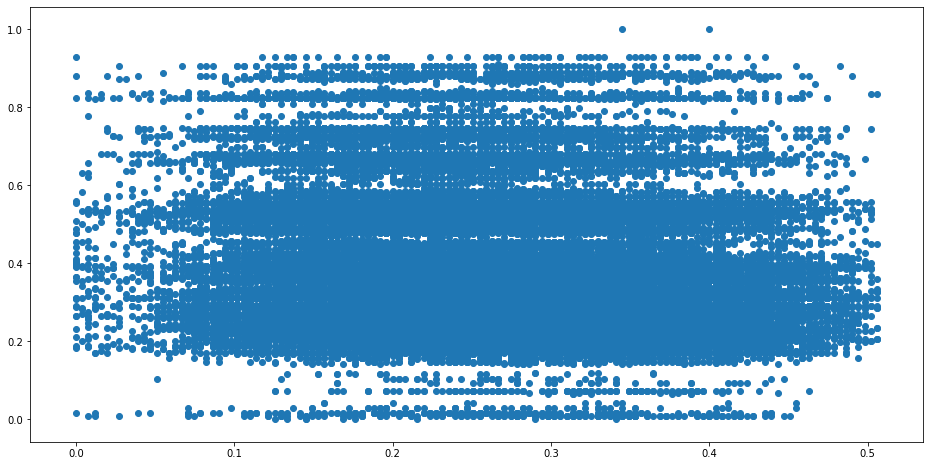

In [105]:
plt.figure(figsize=(16,8))
plt.scatter(df.loc[:,"Speed_Dimensionless"], df.loc[:,"Length_Dimensionless"])

In [106]:
#Redimensionalize Dimensionless Speed to reach a more accurate outcome

df["Speed_Dimensionless_Rescaled"] = df["Speed_Dimensionless"].apply(lambda x: ((x-df["Speed_Dimensionless"].min())/(df["Speed_Dimensionless"].max()-df["Speed_Dimensionless"].min())))

In [9]:
df.head(5)

,Unnamed: 0,Base Ship Length (m),Compared Ship Speed (m/s),Distance (m),Ship Domain (m)(2*Base Ship Length),Violation Distance (m),Violation Check,Area,Season,Violation/Length (m),VD_Dimensionless_2SD,Speed_Dimensionless,Distance_Dimensionless,Length_Dimensionless,Speed_Dimensionless_Rescaled
0,0,22.0,4.9858,93.806611,44.0,49.806611,0,1,Spring,2.263937,0.052428,0.278431,0.092319,0.016026,0.550388
1,2,22.0,5.4998,524.199655,44.0,480.199655,0,1,Spring,21.827257,0.505506,0.317647,0.523443,0.016026,0.627907
2,3,190.0,4.7802,732.630581,380.0,352.630581,0,1,Spring,1.855950,0.371213,0.262745,0.732228,0.554487,0.519380
3,4,83.0,4.3690,968.411765,166.0,802.411765,0,1,Spring,9.667612,0.844701,0.231373,0.968410,0.211538,0.457364
4,5,185.0,5.1400,359.910324,370.0,-10.089676,1,1,Spring,-0.054539,-0.019752,0.290196,0.358875,0.538462,0.573643


In [10]:
#df.to_csv("Preprocessed_Merged.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73543 entries, 0 to 73542
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           73543 non-null  int64  
 1   Base Ship Length (m)                 73543 non-null  float64
 2   Compared Ship Speed (m/s)            73543 non-null  float64
 3   Distance (m)                         73543 non-null  float64
 4   Ship Domain (m)(2*Base Ship Length)  73543 non-null  float64
 5   Violation Distance (m)               73543 non-null  float64
 6   Violation Check                      73543 non-null  int64  
 7   Area                                 73543 non-null  int64  
 8   Season                               73543 non-null  object 
 9   Violation/Length (m)                 73543 non-null  float64
 10  VD_Dimensionless_2SD                 73543 non-null  float64
 11  Speed_Dimensionless         

In [110]:
#df.to_csv('22_March_Finalized_Dataframe.csv', index=True)

In [11]:
X = df.iloc[:, lambda df: [13,14,10]].values

In [102]:
X

array([[ 0.01602564,  0.5503876 ,  0.05242805],
       [ 0.01602564,  0.62790698,  0.50550579],
       [ 0.55448718,  0.51937984,  0.37121294],
       ...,
       [ 0.53205128,  0.41085271, -0.22825817],
       [ 0.25      ,  0.62790698,  0.06330642],
       [ 0.21474359,  0.27131783,  0.27441182]])

In [10]:
#elbow method
X = df.iloc[:, lambda df: [13,14,10]].values

distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

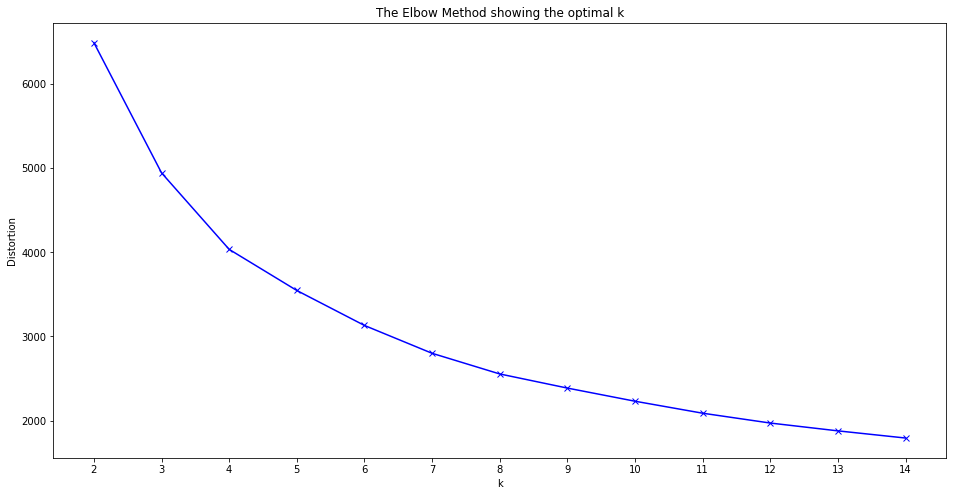

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.xticks(range(2,15))
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [14]:
km_scores= []
km_silhouette = []
labels_holder = {}
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    preds = km.predict(X)
    labels_holder[i-2] = preds
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X)))
    km_scores.append(-km.score(X))
    
    silhouette = silhouette_score(X,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Score for number of cluster(s) 2: -6492.407754914209
Silhouette score for number of cluster(s) 2: 0.36514917623096
Score for number of cluster(s) 3: -4944.508892609384
Silhouette score for number of cluster(s) 3: 0.3183066009675556
Score for number of cluster(s) 4: -4035.115097165955
Silhouette score for number of cluster(s) 4: 0.31437021013853966
Score for number of cluster(s) 5: -3545.9393670851514
Silhouette score for number of cluster(s) 5: 0.2790559027640964
Score for number of cluster(s) 6: -3131.238217150775
Silhouette score for number of cluster(s) 6: 0.2821453642581437
Score for number of cluster(s) 7: -2799.5675649673144
Silhouette score for number of cluster(s) 7: 0.2752864379703008
Score for number of cluster(s) 8: -2553.92752208389
Silhouette score for number of cluster(s) 8: 0.26650027296360024
Score for number of cluster(s) 9: -2386.0344903780588
Silhouette score for number of cluster(s) 9: 0.2605127801706437
Score for number of cluster(s) 10: -2229.77005003377
Silhouett

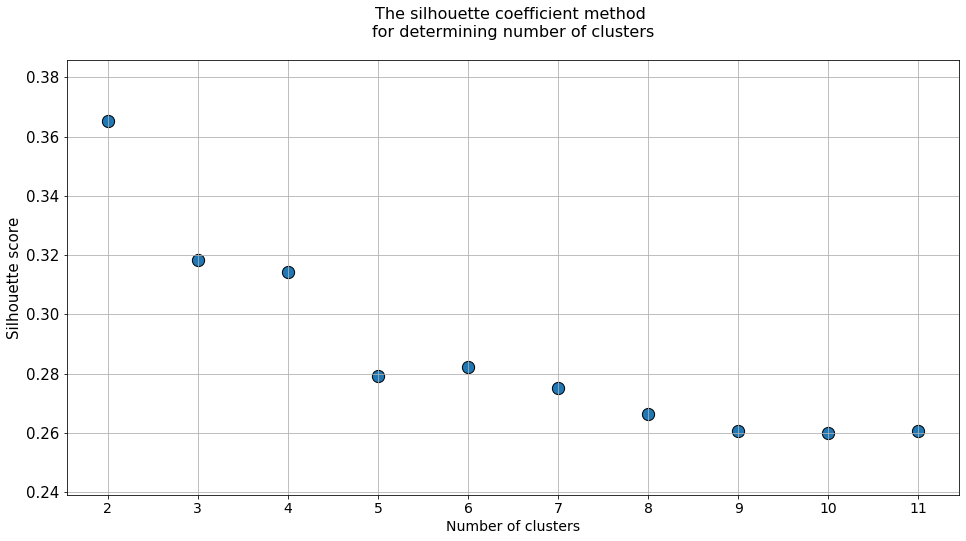

In [50]:
plt.figure(figsize=(16,8))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [21]:
X = df.iloc[:, lambda df: [13,14,10]].values

fig = ipv.figure(height=600, width=600, layout={'width':'100%', 'height':'100%'})
scatter = ipv.scatter(*X.T, size=0.5, marker="sphere")
ipv.scatter(kmeans_5_fitted_centers[:,0], kmeans_5_fitted_centers[:,1], 
            kmeans_5_fitted_centers[:,2], size=12, color='black', marker="sphere")
ipv.xlim(0, 1)
ipv.ylim(0, 1)
ipv.zlim(-1, 1)
ipv.xlabel = "Base Ship Length (Scaled, DLess)"
ipv.ylabel = "Compared Ship Speed (Scaled, DLess)"
ipv.zlabel = "Violation Distance per Base Ship Length (Scaled, DLess)"

display(fig)

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

In [13]:
avaliable_colors = {
    0: '#ff0000',
    1: '#00ff00',
    2: '#0000ff',
    3: '#ffff00',
    4: '#00ffff',
    5: '#ff00ff',
    6: '#FF9900',
    7: '#00FF99',
    8: '#660099'
}

In [14]:
def hex_to_rgb(hex):
    hex = hex[1:]
    return struct.unpack('BBB', bytes.fromhex(hex))

In [15]:
kmeans = KMeans(n_clusters=6)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

In [16]:
def handle_cp_change(labels, **groups):
    group_ids = [int(g.split(' ')[1]) for g in groups.keys()]
    group_color = {k: hex_to_rgb(get_cp_value(cp)) for k, cp in zip(group_ids, groups.values())}
    colors = list(map(lambda x: group_color[x], labels))
    scatter.color = colors
def get_cp_value(cp):
    if type(cp) == ColorPicker:
        return cp.value
    else:
        return cp

In [17]:
def color_scatter_with_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    color_pickers = {f'group {k}': ColorPicker(value=avaliable_colors[k%7], description=f'group {k}') 
                     for k in range(n_clusters)}
    handle_cp_change(labels=list(labels), **color_pickers)
    return interact(handle_cp_change, labels=fixed(list(labels)) , **color_pickers)

In [18]:
VBox([fig, interactive(color_scatter_with_kmeans, n_clusters=(1, 10, 1))])

In [23]:

kmeans_3 = KMeans(n_clusters=3)
kmeans_5 = KMeans(n_clusters=5)
kmeans_9 = KMeans(n_clusters=9)

"""kmeans_3_fitted = kmeans_3.fit(X)
kmeans_5_fitted = kmeans_5.fit(X)
kmeans_9_fitted = kmeans_9.fit(X)"""

#labels = kmeans.predict(X)

"""kmeans_3_fitted_centers = kmeans_3_fitted.cluster_centers_
kmeans_5_fitted_centers = kmeans_5_fitted.cluster_centers_
kmeans_9_fitted_centers = kmeans_9_fitted.cluster_centers_"""


In [ ]:
#x = Base Ship Length - DLess
#y = Compared Ship Speed Dimensionless
#z = Distance Dimensionless

In [76]:
x = np.random.randint(2, size = 73743)

In [147]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    preds = km.predict(X)

    db = davies_bouldin_score(X,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
"""    
    v_measure = v_measure_score(X,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)"""

Davies Bouldin score for number of cluster(s) 2: 1.036067306094359
Davies Bouldin score for number of cluster(s) 3: 1.13454283056158
Davies Bouldin score for number of cluster(s) 4: 1.1122183982263847
Davies Bouldin score for number of cluster(s) 5: 1.1781935631409852
Davies Bouldin score for number of cluster(s) 6: 1.1493650955678554
Davies Bouldin score for number of cluster(s) 7: 1.0665852395762176
Davies Bouldin score for number of cluster(s) 8: 1.089619968785017
Davies Bouldin score for number of cluster(s) 9: 1.078802417391935
Davies Bouldin score for number of cluster(s) 10: 1.1072021905876326
Davies Bouldin score for number of cluster(s) 11: 1.0428915096172666


'    \n    v_measure = v_measure_score(X,preds)\n    vmeasure_score.append(v_measure)\n    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))\n    print("-"*100)'

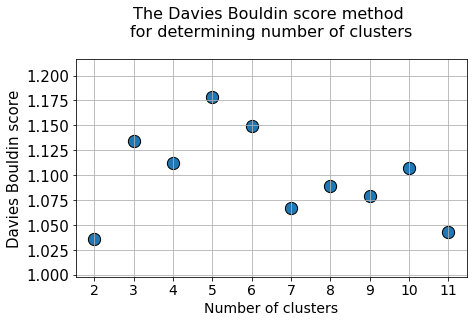

In [149]:
plt.figure(figsize=(7,4))
plt.title("The Davies Bouldin score method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Davies Bouldin score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
#DBScan

clustering_dbscan_labels = DBSCAN(eps=5, min_samples=2).fit(M)


In [47]:
labels_DB = df["Violation Check"]

In [117]:
len(labels_DB)

100

In [145]:
M = X[0:40000]

In [48]:
fig = ipv.figure(height=600, width=600, layout={'width':'100%', 'height':'100%'})
scatter = ipv.scatter(*X.T, size=1, marker="sphere")
ipv.xlim(0, 1)
ipv.ylim(0, 1)
ipv.zlim(-1, 1)
ipv.xlabel = "Base Ship Length (Scaled, DLess)"
ipv.ylabel = "Compared Ship Speed (Scaled, DLess)"
ipv.zlabel = "Violation Distance per Base Ship Length (Scaled, DLess)"

display(fig)

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

In [119]:
avaliable_colors = {
    0: '#ff0000',
    1: '#00ff00',
    2: '#0000ff',
    3: '#ffff00',
    4: '#00ffff',
    5: '#ff00ff',
    6: '#000000'
}

In [120]:
def hex_to_rgb(hex):
    hex = hex[1:]
    return struct.unpack('BBB', bytes.fromhex(hex))

In [141]:
labels = labels_DB

In [125]:
def handle_cp_change(labels, **groups):
    group_ids = [int(g.split(' ')[1]) for g in groups.keys()]
    group_color = {k: hex_to_rgb(get_cp_value(cp)) for k, cp in zip(group_ids, groups.values())}
    colors = list(map(lambda x: group_color[x], labels))
    scatter.color = colors
def get_cp_value(cp):
    if type(cp) == ColorPicker:
        return cp.value
    else:
        return cp

In [126]:
def color_scatter_with_kmeans(n_clusters):
    color_pickers = {f'group {k}': ColorPicker(value=avaliable_colors[k%7], description=f'group {k}') 
                     for k in range(n_clusters)}
    handle_cp_change(labels=list(labels), **color_pickers)
    return interact(handle_cp_change, labels=fixed(list(labels)) , **color_pickers)

In [49]:
VBox([fig, interactive(color_scatter_with_kmeans, n_clusters=(1, 10, 1))])

In [105]:
ipv.figure()
ipv.xlim(0, 1)
ipv.ylim(0, 1)
ipv.zlim(-1, 1)
ipv.scatter(kmeans_3_fitted_centers[:,0], kmeans_3_fitted_centers[:,1], 
            kmeans_3_fitted_centers[:,2], size=10, color='red', marker="sphere")
ipv.scatter(kmeans_5_fitted_centers[:,0], kmeans_5_fitted_centers[:,1], 
            kmeans_5_fitted_centers[:,2], size=10, color='blue', marker="sphere")
ipv.scatter(kmeans_9_fitted_centers[:,0], kmeans_9_fitted_centers[:,1], 
            kmeans_9_fitted_centers[:,2], size=10, color='yellow', marker="sphere")
ipv.show()

In [20]:
kmeans_3_fitted_centers = kmeans_3_fitted.cluster_centers_
kmeans_5_fitted_centers = kmeans_5_fitted.cluster_centers_
kmeans_9_fitted_centers = kmeans_9_fitted.cluster_centers_

In [101]:
kmeans_3_fitted_centers

array([[ 0.25580758,  0.52280273, -0.20279473],
       [ 0.80152572,  0.35817362,  0.5729957 ],
       [ 0.3949153 ,  0.33433304,  0.16102218]])

In [102]:
kmeans_5_fitted_centers

array([[ 0.68019577,  0.61312774,  0.27789948],
       [ 0.29604621,  0.32514339,  0.05544896],
       [ 0.25942994,  0.59081759, -0.27809471],
       [ 0.54433967,  0.28938587,  0.3478992 ],
       [ 0.85744049,  0.32273941,  0.6550341 ]])

In [103]:
kmeans_9_fitted_centers

array([[ 0.35890932,  0.55530862, -0.05415384],
       [ 0.90193213,  0.28865193,  0.72418303],
       [ 0.19088103,  0.31641174, -0.07996214],
       [ 0.70164494,  0.2926508 ,  0.51107003],
       [ 0.23805752,  0.64784319, -0.38951871],
       [ 0.32115138,  0.28738813,  0.11465803],
       [ 0.86196658,  0.57651545,  0.49308795],
       [ 0.50214191,  0.29155956,  0.30212477],
       [ 0.60336953,  0.59661922,  0.20807869]])

In [ ]:
#X: Base Length
#Y: Compared Speed
#Z: Violation per Base Length

In [116]:
#ML Applications

In [6]:
df = pd.read_csv('22_March_Finalized_Dataframe.csv')

In [19]:
X = df.iloc[:, lambda df: [13,14,11]].values

kmeans_3 = KMeans(n_clusters=3)
kmeans_5 = KMeans(n_clusters=5)
kmeans_9 = KMeans(n_clusters=9)

kmeans_3_fitted = kmeans_3.fit(X)
kmeans_5_fitted = kmeans_5.fit(X)
kmeans_9_fitted = kmeans_9.fit(X)

In [97]:
labels_3 = kmeans_3_fitted.predict(X)
labels_5 = kmeans_5_fitted.predict(X)
labels_9 = kmeans_9_fitted.predict(X)

In [98]:
df["KMeans_Labels_3_Clusters"] = labels_3
df["KMeans_Labels_5_Clusters"] = labels_5
df["KMeans_Labels_9_Clusters"] = labels_9

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73543 entries, 0 to 73542
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           73543 non-null  int64  
 1   Unnamed: 0.1                         73543 non-null  int64  
 2   Base Ship Length (m)                 73543 non-null  float64
 3   Compared Ship Speed (m/s)            73543 non-null  float64
 4   Distance (m)                         73543 non-null  float64
 5   Ship Domain (m)(2*Base Ship Length)  73543 non-null  float64
 6   Violation Distance (m)               73543 non-null  float64
 7   Violation Check                      73543 non-null  int64  
 8   Area                                 73543 non-null  int64  
 9   Season                               73543 non-null  object 
 10  Violation/Length (m)                 73543 non-null  float64
 11  VD_Dimensionless_2SD        

In [122]:
#df_C3 = df.loc[df['KMeans_Labels_3_Clusters'].isin(0,2)]

df_C3 = df.loc[df['KMeans_Labels_3_Clusters'] != 1]

In [123]:
df_C3

,Unnamed: 0,Unnamed: 0.1,Base Ship Length (m),Compared Ship Speed (m/s),Distance (m),Ship Domain (m)(2*Base Ship Length),Violation Distance (m),Violation Check,Area,Season,Violation/Length (m),VD_Dimensionless_2SD,Speed_Dimensionless,Distance_Dimensionless,Length_Dimensionless,Speed_Dimensionless_Rescaled,KMeans_Labels_3_Clusters,KMeans_Labels_5_Clusters,KMeans_Labels_9_Clusters
0,0,0,22.0,4.9858,93.806611,44.0,49.806611,0,1,Spring,2.263937,0.052428,0.278431,0.092319,0.016026,0.550388,2,1,2
4,4,5,185.0,5.1400,359.910324,370.0,-10.089676,1,1,Spring,-0.054539,-0.019752,0.290196,0.358875,0.538462,0.573643,0,1,0
8,8,9,173.0,5.3456,492.869688,346.0,146.869688,0,1,Spring,0.848958,0.154607,0.305882,0.492060,0.500000,0.604651,2,0,8
11,11,12,191.0,5.2428,285.506582,382.0,-96.493418,1,1,Spring,-0.505201,-0.188915,0.298039,0.284344,0.557692,0.589147,0,2,0
12,12,13,222.0,3.4952,366.573394,444.0,-77.426606,1,1,Spring,-0.348768,-0.151586,0.164706,0.365549,0.657051,0.325581,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73538,73538,73793,97.0,6.3736,308.226661,194.0,114.226661,0,13,Summer,1.177594,0.120243,0.384314,0.307103,0.256410,0.759690,2,1,5
73539,73539,73794,226.0,4.9858,676.017564,452.0,224.017564,0,13,Summer,0.991228,0.235821,0.278431,0.675519,0.669872,0.550388,2,0,8
73540,73540,73795,183.0,4.0606,249.411345,366.0,-116.588655,1,13,Summer,-0.637096,-0.228258,0.207843,0.248188,0.532051,0.410853,0,2,4
73541,73541,73796,95.0,5.4998,250.140328,190.0,60.140328,0,13,Summer,0.633056,0.063306,0.317647,0.248918,0.250000,0.627907,2,1,5


In [9]:
#13,14,6

In [10]:
#Remember to re-do with k-fold!

In [11]:
M_Predictors = df.iloc[:, lambda df: [14,15]].values
M_Classes = df.iloc[:, lambda df: [7]].values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(
M_Predictors, M_Classes, test_size = 0.3, random_state = 2)

In [83]:
def KNeighbors(X, y, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, plot_confusion_matrix, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    accuracy_score_holder = []
    misclassified_sample_count = []
    precision_score_holder_KNN = []
    roc_auc_score_holder = []
    confusion_matrix_holder_KNN = []
    recall_score_holder_KNN = []
    for i in range (3,12):
        knn=KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') 
        knn.fit(X, y)
        myprediction_knn = knn.predict(X_test)
        accuracy_score_holder.append(accuracy_score(y_test, myprediction_knn))
        misclassified_sample_count.append((y_test != myprediction_knn).sum())
        roc_auc_score_holder.append(roc_auc_score(y_test, myprediction_knn))
        recall_score_KNN = recall_score(y_test, myprediction_knn)
        precision_score_holder_KNN.append(precision_score(y_test, myprediction_knn))
        recall_score_holder_KNN.append(recall_score(y_test, myprediction_knn))
        confusion_matrix_holder_KNN.append(confusion_matrix(y_test, myprediction_knn))
        #precision_score_holder.append(y_test, knn.predict(X_test), average = 'micro')
        i = i + 1
    #print("Accuracy Score:", accuracy_score_holder)
    #print("Precision Score:", precision_score_holder)
    #print("Misclassified samples:", misclassified_sample_count)
    #print("ROC - AUC Score:", roc_auc_score_holder)
    #plot_confusion_matrix(knn, X_test, y_test)
    #plt.show()
    
    #y_scores = knn.predict_proba(X_test)
    #fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1], pos_label = 6)
    #roc_auc = auc(fpr, tpr)

    #plt.title('Receiver Operating Characteristic')
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.title('ROC Curve of kNN')
    #plt.show()
    
    return  confusion_matrix_holder_KNN, precision_score_holder_KNN, recall_score_holder_KNN, accuracy_score_holder, roc_auc_score_holder, misclassified_sample_count


In [84]:
Conf_KNN, Precision_KNN, Recall_KNN, Accuracy_KNN, Roc_Auc_KNN, Misclassified_Count_KNN = KNeighbors(X_train, Y_train.ravel(), X_test, Y_test.ravel())


In [85]:
Conf_KNN

[array([[15796,  1830],
        [ 3114,  1323]]),
 array([[16720,   906],
        [ 3635,   802]]),
 array([[16072,  1554],
        [ 3188,  1249]]),
 array([[16703,   923],
        [ 3624,   813]]),
 array([[16204,  1422],
        [ 3280,  1157]]),
 array([[16694,   932],
        [ 3583,   854]]),
 array([[16309,  1317],
        [ 3271,  1166]]),
 array([[16681,   945],
        [ 3550,   887]]),
 array([[16351,  1275],
        [ 3311,  1126]])]

In [87]:
Recall_KNN

[0.29817444219066935,
 0.18075276087446474,
 0.28149650664863646,
 0.1832319134550372,
 0.2607617759747577,
 0.1924723912553527,
 0.2627901735406806,
 0.1999098489970701,
 0.2537750732476899]

In [70]:
def forest(X, y, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    myforest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 60)
    myforest.fit(X, y)
    myprediction_forest = myforest.predict(X_test)
    #print("Accuracy Score: ", accuracy_score(y_test,myprediction_forest))
    #print("Number of Misclassified Samples: ", (y_test != myprediction_forest).sum())
    #print("ROC - AUC Score:", roc_auc_score(y_test, myprediction_forest))

    #plot_confusion_matrix(myforest, X_test, y_test)
    #plt.show()
    
    #y_scores = myforest.predict_proba(X_test)
    #fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1], pos_label = 6)
    #roc_auc = auc(fpr, tpr)

    #plt.title('Receiver Operating Characteristic')
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.title('ROC Curve of Random Forest')
    #plt.show()
    
    return confusion_matrix(y_test, myprediction_forest), precision_score(y_test,myprediction_forest), recall_score(y_test,myprediction_forest), accuracy_score(y_test,myprediction_forest), roc_auc_score(y_test, myprediction_forest), (y_test != myprediction_forest).sum()


In [71]:
Confusion_forest, Precision_forest, Recall_forest, Accuracy_forest, Roc_Auc_forest, Misclassified_Count_forest = forest(X_train, Y_train.ravel(), X_test, Y_test.ravel())


In [ ]:
#Precision_svm, Recall_svm, Accuracy_svm, Roc_Auc_svm, Misclassified_Count_svm = svm(X_train, Y_train.ravel(), X_test, Y_test.ravel())


In [47]:
def perceptron_(X, y, X_test, y_test):
    from sklearn.linear_model import Perceptron
    from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score

    for i in range (30,31):
        myperceptron = Perceptron(penalty = 'elasticnet', max_iter = i, eta0 = 0.001, random_state = 60)
        myperceptron.fit(X, y)
        myprediction_perceptron = myperceptron.predict(X_test)
        #print(accuracy_score(y_test,myprediction_perceptron))
        
        #print("Accuracy Score: ", accuracy_score(y_test,myprediction_perceptron))
        #print("Number of Misclassified Samples: ", (y_test != myprediction_perceptron).sum())
        #print("ROC - AUC Score:", roc_auc_score(y_test, myprediction_perceptron))

    #plot_confusion_matrix(myperceptron, X_test, y_test)
    #plt.show()
    
    return confusion_matrix(y_test, myprediction_perceptron),precision_score(y_test,myprediction_perceptron), recall_score(y_test,myprediction_perceptron) ,accuracy_score(y_test,myprediction_perceptron), roc_auc_score(y_test, myprediction_perceptron), (y_test != myprediction_perceptron).sum()


In [49]:
Conf_perceptron, Precision_perceptron, Recall_perceptron, Accuracy_perceptron, Roc_Auc_perceptron, Misclassified_Count_perceptron = perceptron_(X_train, Y_train.ravel(), X_test, Y_test.ravel())


In [39]:
Roc_Auc_perceptron

0.5443905845138672

In [52]:
Conf_KNN

array([[16204,  1422],
       [ 3280,  1157]])

In [40]:
Conf_perceptron

array([[17292,   334],
       [ 3959,   478]])

In [50]:
Precision_perceptron

0.5886699507389163

In [51]:
Recall_perceptron

0.10773044850123957

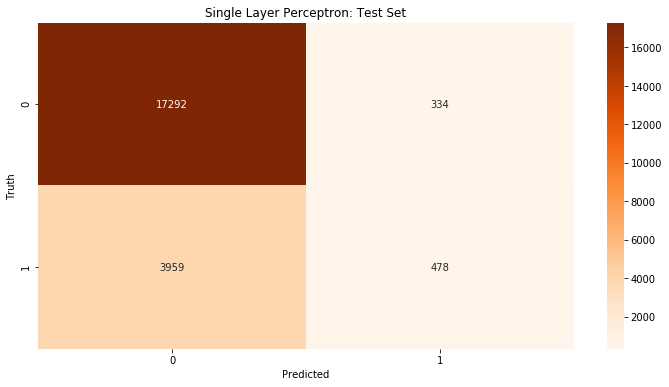

In [118]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(Conf_perceptron, fmt='.0f', annot=True,ax=ax,
xticklabels=[0,1], yticklabels=[0,1], cmap = 'Oranges');
ax.set(xlabel = 'Predicted', ylabel='Truth',title='Single Layer Perceptron: Test Set', ylim=(2,0))
plt.show()

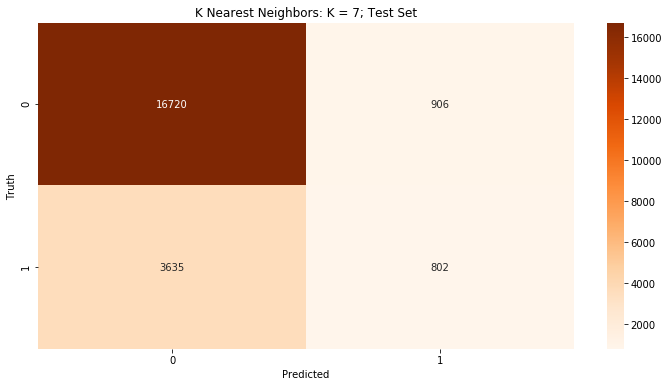

In [117]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(Conf_KNN[1], fmt='.0f', annot=True,ax=ax,
xticklabels=[0,1], yticklabels=[0,1], cmap = 'Oranges');
ax.set(xlabel = 'Predicted', ylabel='Truth',title='K Nearest Neighbors: K = 7; Test Set', ylim=(2,0))
plt.show()

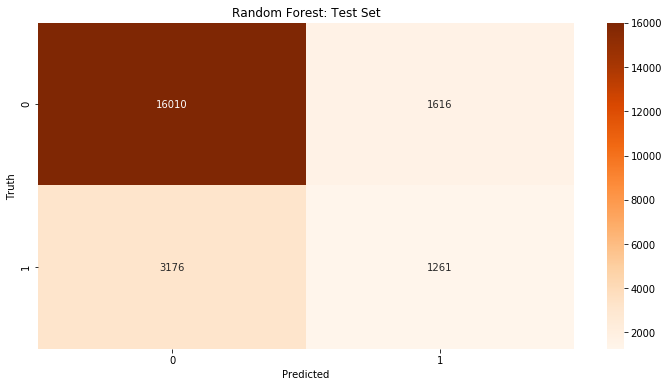

In [115]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(Confusion_forest, fmt='.0f', annot=True,ax=ax,
xticklabels=[0,1], yticklabels=[0,1], cmap = 'Oranges');
ax.set(xlabel = 'Predicted', ylabel='Truth',title='Random Forest: Test Set', ylim=(2,0))
plt.show()

In [150]:
from sklearn.linear_model import LogisticRegression

def logistic(X, y, X_test, y_test):
    #from sklearn.linear_model import Perceptron
    from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score

    for i in range (30,31):
        mylogreg = LogisticRegression(penalty = 'l2', random_state = 60)
        mylogreg.fit(X, y)
        myprediction_logreg = mylogreg.predict(X_test)
        #print(accuracy_score(y_test,myprediction_perceptron))
        
        #print("Accuracy Score: ", accuracy_score(y_test,myprediction_perceptron))
        #print("Number of Misclassified Samples: ", (y_test != myprediction_perceptron).sum())
        #print("ROC - AUC Score:", roc_auc_score(y_test, myprediction_perceptron))

    #plot_confusion_matrix(myperceptron, X_test, y_test)
    #plt.show()
    
    return confusion_matrix(y_test, myprediction_logreg),precision_score(y_test,myprediction_logreg), recall_score(y_test,myprediction_logreg) ,accuracy_score(y_test,myprediction_logreg), roc_auc_score(y_test, myprediction_logreg), (y_test != myprediction_logreg).sum()


In [151]:
#Regular
Conf_logistic, Precision_logistic, Recall_logistic, Accuracy_logistic, Roc_Auc_logistic, Misclassified_Count_logistic = logistic(X_train, Y_train.ravel(), X_test, Y_test.ravel())


In [155]:
#C3 - 2 Clusters

Conf_logistic_C3, Precision_logistic_C3, Recall_logistic_C3, Accuracy_logistic_C3, Roc_Auc_logistic_C3, Misclassified_Count_logistic_C3 = logistic(X_C3_train, Y_C3_train.ravel(), X_C3_test, Y_C3_test.ravel())


In [73]:
def MultiLayerPerceptron(X, y, X_test, y_test, hidden_layer_units=25, alpha=0.03, epoch=20):
    # Initialization
    #X = tr_images
    #y = tr_labels
    y_reserved_train = y
    y = pd.get_dummies(y).to_numpy()
    #X_test = tt_images
    #y_test = tt_labels
    y_reserved_test = y_test
    y_test = pd.get_dummies(y_test).to_numpy()

    #hidden_layer_units = 25

    W1 = Weight_Initialization(X.shape[1], hidden_layer_units, -0.0001, 0.0001)
    W2 = Weight_Initialization(hidden_layer_units, y.shape[1], -0.0001, 0.0001)
    b1 = Weight_Initialization(1, hidden_layer_units, -0.0001, 0.0001)
    b2 = Weight_Initialization(1, y.shape[1], -0.0001, 0.0001)

    #alpha = 0.03
    #epoch = 20

    Accuracy_train_accumulated = []
    Accuracy_test_accumulated = []
    # Forward Pass

    for j in range(epoch):
        start = time.time()
        for i in range(X.shape[0]):
            Z1 = np.dot(X[i],W1) + b1
            A1 = sigmoid(Z1)
            Z2 = np.dot(A1,W2) + b2
            A2 = softmax(Z2)
            classes = np.argmax(A2,axis=1)
            Accuracy = (sum(classes == y_reserved_train[i]))
            Loss = Loss_Perceptron(y[i],A2)
            
            W1_Update = alpha * np.dot(X[i].T.reshape(X.shape[1],1), np.multiply((np.dot(W2, (y[i]-A2).T)).T, A1 - np.power(A1, 2)))
            b1_Update = alpha * np.sum(np.multiply(np.dot(W2, (y[i]-A2).T).T, A1 - np.power(A1, 2)), axis = 1, keepdims = True)

            W2_Update = alpha * np.dot(A1.T, (y[i]-A2))
            b2_Update = alpha * np.sum((y[i]-A2), axis = 1, keepdims = True)

            W1 += W1_Update
            W2 += W2_Update
            b1 += b1_Update
            b2 += b2_Update
        
        # Train Set Accuracy for Each Epoch
        highest_weight_train = []
        highest_bias_train = []
        highest_accuracy_train = 0

        Z1 = np.dot(X,W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1,W2) + b2
        A2 = softmax(Z2)

        classes_train = np.argmax(A2,axis=1)
        Accuracy_train = (sum(classes_train == y_reserved_train))/X.shape[0]
        if Accuracy_train>highest_accuracy_train:
            highest_weight_train = W1
            highest_bias_train = b1
            highest_accuracy_train = Accuracy_train
        Accuracy_train_accumulated.append(Accuracy_train)
        
        # Test Set Accuracy for Each Epoch

        Z1_test = np.dot(X_test,W1) + b1
        A1_test = sigmoid(Z1_test)
        Z2_test = np.dot(A1_test,W2) + b2
        A2_test = softmax(Z2_test)
        
        classes_test = np.argmax(A2_test,axis=1)
        Accuracy_test = (sum(classes_test == y_reserved_test))/X_test.shape[0]    
        Accuracy_test_accumulated.append(Accuracy_test)
        stop = time.time() 

        
        print(f'for Epoch {j}, Training Accuracy: {Accuracy_train:.3f} & Testing Accuracy: {Accuracy_test:.3f}, Time per Epoch: {(stop-start):.2f} seconds')

    return Accuracy_train_accumulated, Accuracy_test_accumulated, W1, W2, b1, b2, classes_train, classes_test

In [77]:
Accuracy_Train_MLP, Accuracy_Test_MLP, W1_MLP, W2_MLP, b1_MLP, b2_MLP, classes_train_MLP, classes_test_MLP = MultiLayerPerceptron(X_train, Y_train.ravel(), X_test, Y_test.ravel(),hidden_layer_units=25, alpha=0.03, epoch=5)



for Epoch 0, Training Accuracy: 0.796 & Testing Accuracy: 0.799, Time per Epoch: 7.90 seconds
for Epoch 4, Training Accuracy: 0.796 & Testing Accuracy: 0.799, Time per Epoch: 9.69 seconds


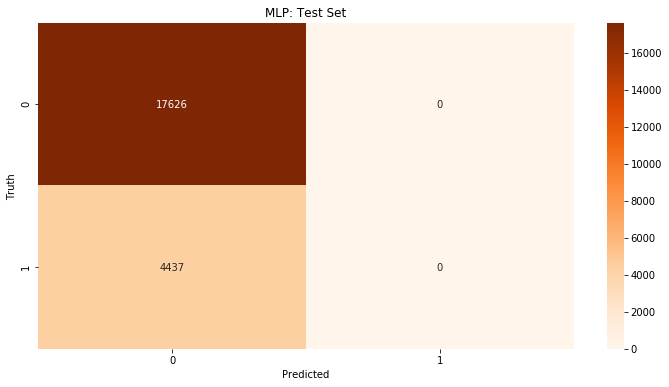

In [114]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(confusion_matrix(Y_test, classes_test_MLP), fmt='.0f', annot=True,ax=ax,
xticklabels=[0,1], yticklabels=[0,1], cmap = 'Oranges');
ax.set(xlabel = 'Predicted', ylabel='Truth',title='MLP: Test Set', ylim=(2,0))
plt.show()

In [126]:
#3 Clusters Case

M_Predictors_C3 = df_C3.iloc[:, lambda df: [14,15]].values
M_Classes_C3 = df_C3.iloc[:, lambda df: [7]].values

In [127]:
X_C3_train, X_C3_test, Y_C3_train, Y_C3_test = train_test_split(
M_Predictors_C3, M_Classes_C3, test_size = 0.3, random_state = 2)

In [133]:
Confusion_forest_C3, Precision_forest_C3, Recall_forest_C3, Accuracy_forest_C3, Roc_Auc_forest_C3, Misclassified_Count_forest_C3 = forest(X_C3_train, Y_C3_train.ravel(), X_C3_test, Y_C3_test.ravel())
Conf_perceptron_C3, Precision_perceptron_C3, Recall_perceptron_C3, Accuracy_perceptron_C3, Roc_Auc_perceptron_C3, Misclassified_Count_perceptron_C3 = perceptron_(X_C3_train, Y_C3_train.ravel(), X_C3_test, Y_C3_test.ravel())
Conf_KNN_C3, Precision_KNN_C3, Recall_KNN_C3, Accuracy_KNN_C3, Roc_Auc_KNN_C3, Misclassified_Count_KNN_C3 = KNeighbors(X_C3_train, Y_C3_train.ravel(), X_C3_test, Y_C3_test.ravel())


In [129]:
Precision_forest_C3

0.5523684210526316

In [130]:
Recall_forest_C3

0.47370796659896186

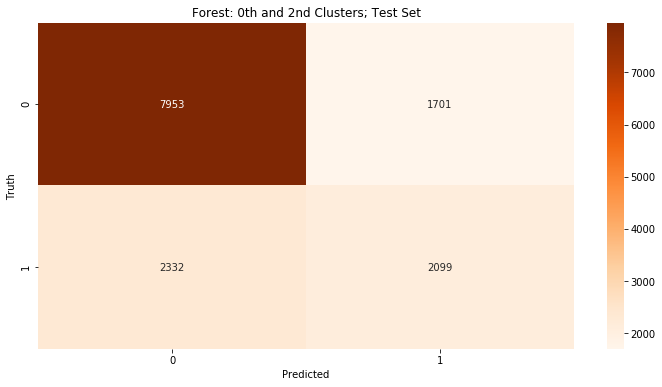

In [132]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(Confusion_forest_C3, fmt='.0f', annot=True,ax=ax,
xticklabels=[0,1], yticklabels=[0,1], cmap = 'Oranges');
ax.set(xlabel = 'Predicted', ylabel='Truth',title='Forest: 0th and 2nd Clusters; Test Set', ylim=(2,0))
plt.show()

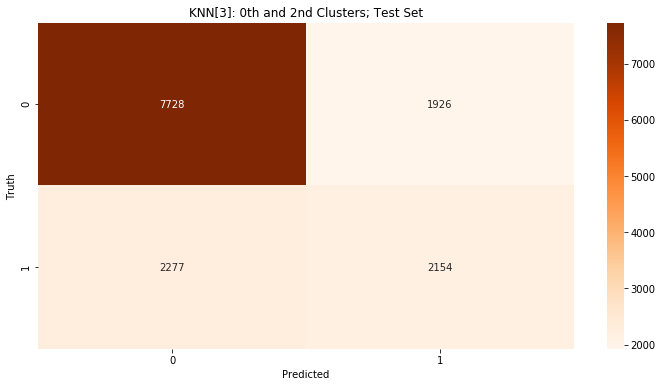

In [136]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(Conf_KNN_C3[0], fmt='.0f', annot=True,ax=ax,
xticklabels=[0,1], yticklabels=[0,1], cmap = 'Oranges');
ax.set(xlabel = 'Predicted', ylabel='Truth',title='KNN[3]: 0th and 2nd Clusters; Test Set', ylim=(2,0))
plt.show()

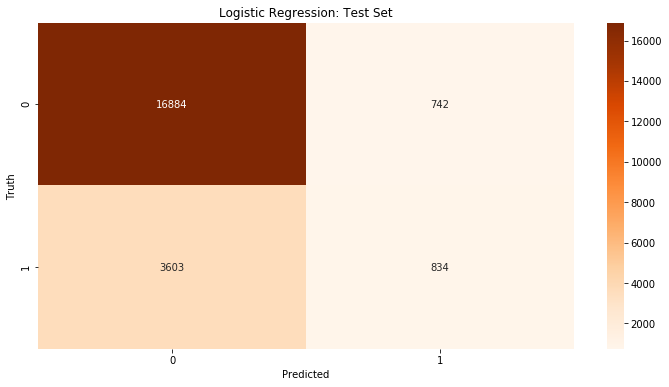

In [152]:
#Conf_logistic
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(Conf_logistic, fmt='.0f', annot=True,ax=ax,
xticklabels=[0,1], yticklabels=[0,1], cmap = 'Oranges');
ax.set(xlabel = 'Predicted', ylabel='Truth',title='Logistic Regression: Test Set', ylim=(2,0))
plt.show()


In [154]:
results = {
    "K Nearest Neighbors[3]" : [Precision_KNN[0], Recall_KNN[0], Accuracy_KNN[0], Roc_Auc_KNN[0]],
    "Random Forest" : [Precision_forest, Recall_forest, Accuracy_forest, Roc_Auc_forest],
    "Single Layer Perceptron" : [Precision_perceptron, Recall_perceptron, Accuracy_perceptron, Roc_Auc_perceptron],
    "Logistic Regression" : [Precision_logistic, Recall_logistic, Accuracy_logistic, Roc_Auc_logistic]
}

outcomes_df = pd.DataFrame(results, columns = ["K Nearest Neighbors[3]", "Random Forest", 
                                               "Single Layer Perceptron", "Logistic Regression"],
                          index = ["Precision", "Recall", "Accuracy", "Roc_Auc"])

outcomes_df = outcomes_df.style.set_properties(**{
    'font-size': '15pt',
})

outcomes_df

,K Nearest Neighbors[3],Random Forest,Single Layer Perceptron,Logistic Regression
Precision,0.419600,0.438304,0.588670,0.529188
Recall,0.298174,0.284201,0.107730,0.187965
Accuracy,0.775914,0.782804,0.805421,0.803064
Roc_Auc,0.597175,0.596259,0.544391,0.572934


In [156]:
results_C3 = {
    "K Nearest Neighbors[3]" : [Precision_KNN_C3[0], Recall_KNN_C3[0], Accuracy_KNN_C3[0], Roc_Auc_KNN_C3[0]],
    "Random Forest" : [Precision_forest_C3, Recall_forest_C3, Accuracy_forest_C3, Roc_Auc_forest_C3],
    "Logistic Regression" : [Precision_logistic_C3, Recall_logistic_C3, Accuracy_logistic_C3, Roc_Auc_logistic_C3]
}

outcomes_df_C3 = pd.DataFrame(results_C3, columns = ["K Nearest Neighbors[3]", "Random Forest", "Logistic Regression"],
                          index = ["Precision", "Recall", "Accuracy", "Roc_Auc"])

outcomes_df_C3 = outcomes_df_C3.style.set_properties(**{
    'font-size': '15pt',
})
outcomes_df_C3

,K Nearest Neighbors[3],Random Forest,Logistic Regression
Precision,0.527941,0.552368,0.642010
Recall,0.486121,0.473708,0.415256
Accuracy,0.701597,0.713667,0.743202
Roc_Auc,0.643309,0.648756,0.654489


NameError: name 'Precision_KNN_C3' is not defined